## **7번. 단계를 따라 moons 데이터셋에 결정 트리를 훈련시키고 세밀하게 튜닝해보세요**

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

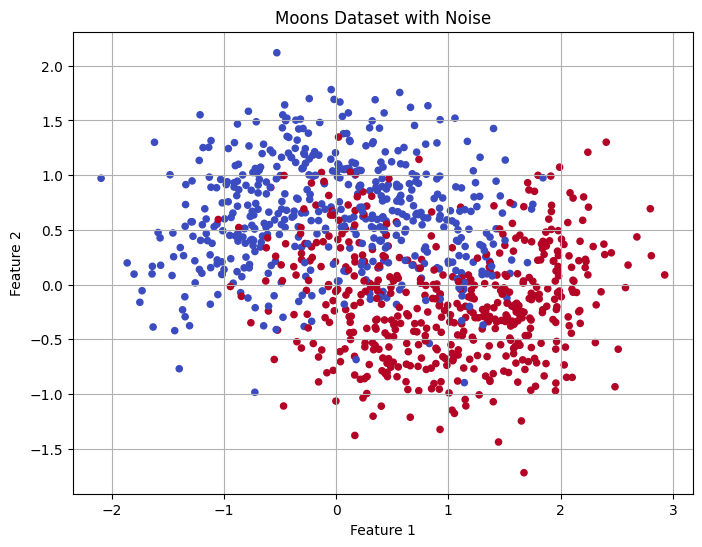

In [6]:
# make_moons(n_samples=1000, noise=0.4)를 사용해 데이터셋을 생성
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise=0.4)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, s=20)
plt.title("Moons Dataset with Noise")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [7]:
# 2) 훈련 세트와 테스트 세트로 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 3) DecisionTreeClassifier의 최적의 매개변수를 찾기 위해 교차 검증과 함께 그리드 서치를 수행합니다 (GridSearchCV 사용)
# 랜덤이 아니기 때문에, 데이터셋이 크고 탐색할 파라미터 범위에 따라 시간 소요 오래 걸림

params = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 10)),
    'min_samples_split': [2, 3, 4]
}


grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)



{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}
0.8337275773703924


In [10]:
# 4) 최적의 파라미터로 전체 훈련 세트에 모델 훈련 후 테스트 세트 평가
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.86

## **8. 단계를 따라 랜덤 포레스트를 만들어보세요**

In [15]:
# a. 이전 연습문제에 이어서 훈련 세트의 서브셋을 1,000개 생성합니다. 각각은 랜덤으로 선택된 100개의 샘플을 담고 있습니다
from sklearn.model_selection import ShuffleSplit
import numpy as np

n_trees = 1000
n_instances = 100
subsets = []
rs = ShuffleSplit(n_splits=n_trees, train_size=n_instances, random_state=42) # 비복원 추출
for mini_train_idx, _ in rs.split(X_train):
    X_mini_train = X_train[mini_train_idx]
    y_mini_train = y_train[mini_train_idx]
    subsets.append((X_mini_train, y_mini_train))


In [17]:
# b. 이전 연습문제에서 찾은 최적의 매개변수를 사용해 각 서브셋으로 결정 트리 훈련 및 예측 저장

forest_predictions = []

for X_mini, y_mini in subsets:
    tree = DecisionTreeClassifier(max_leaf_nodes=grid_search.best_params_["max_leaf_nodes"], random_state=42)
    tree.fit(X_mini, y_mini)
    y_pred = tree.predict(X_test)
    forest_predictions.append(y_pred)

In [24]:
# c. 다수결 투표로 최종 예측
from scipy.stats import mode


# 다수로 나온 예측만
# 사이파이의 mode() 함수: 입력된 배열에서 가장 많이 등장하는 값(최빈값)을 계산해주는 함수
forest_predictions = np.array(forest_predictions)
majority_votes, n_votes = mode(forest_predictions, axis=0, keepdims=False)


In [27]:
majority_votes.shape, n_votes.shape

((1, 200), (1, 200))

In [28]:
# d. 정확도 평가
accuracy_score(y_test, majority_votes.reshape(-1))

0.865